In [16]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

#reading images
from PIL import Image

In [3]:
#pip install --upgrade scipy

In [4]:
new_directory = '/Users/hp/'
os.chdir(new_directory)

In [5]:
# Get the current directory where your notebook is located
notebook_dir = os.getcwd()

# Define the dataset directory relative to the notebook directory
data_dir = os.path.join(notebook_dir, 'wikiart_classification/data')

# Define the paths of dataset
train_csv_path = os.path.join(data_dir, 'train.csv')
test_csv_path = os.path.join(data_dir, 'test.csv')
val_csv_path = os.path.join(data_dir, 'val.csv')
print(train_csv_path)

# Load the train dataset CSV file
train = pd.read_csv(train_csv_path)
train

/Users/hp/wikiart_classification/data/train.csv


,file_path,style,style_id
0,/Users/hp/wikiart/Color_Field_Painting/mario-c...,Color Field Painting,6
1,/Users/hp/wikiart/Post_Impressionism/vincent-v...,Post Impressionism,21
2,/Users/hp/wikiart/Fauvism/august-macke_turkish...,Fauvism,11
3,/Users/hp/wikiart/Contemporary_Realism/john-mi...,Contemporary Realism,7
4,/Users/hp/wikiart/Realism/guntis-strupulis_a-k...,Realism,22
...,...,...,...
805,/Users/hp/wikiart/High_Renaissance/luca-signor...,High Renaissance,12
806,/Users/hp/wikiart/Synthetic_Cubism/juan-gris_t...,Synthetic Cubism,26
807,/Users/hp/wikiart/Rococo/thomas-gainsborough_a...,Rococo,23
808,/Users/hp/wikiart/Ukiyo_e/utagawa-kuniyoshi_sc...,Ukiyo e,27


Load Image

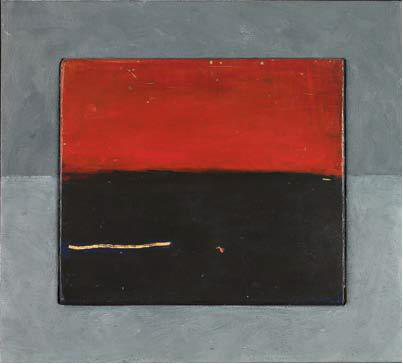

In [6]:
# Get the first image file path from the DataFrame
first_image_path = train['file_path'][0]

# Open and display the first image
img = Image.open(first_image_path)
img

In [7]:
class FineArtDataset(Dataset):
    def __init__(self, csv_path, transform=None):
        self.data_df = pd.read_csv(csv_path)
        self.transform = transform

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, idx):
        image_path = self.data_df['file_path'].iloc[idx]  
        image = Image.open(image_path)
        if self.transform:
            image = self.transform(image)
        label = self.data_df['style_id'].iloc[idx] 
        return image, label

# Set up data transformations
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [8]:
train_dataset = FineArtDataset(train_csv_path, transform=data_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [26]:
# Build CNN models
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.features = models.vgg19(pretrained=True).features
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 512),
            nn.ReLU(True),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [27]:
num_classes_style = 10  # Number of style classes
num_classes_object = 100  # Number of object classes

cnn_style = CNN(num_classes_style)
cnn_object = CNN(num_classes_object)

# Train CNN models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_style.to(device)
cnn_object.to(device)

/Users/hp/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hp/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /Users/hp/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:17<00:00, 32.7MB/s] 


: 

: 

Build a model to identify 1 style

In [9]:
style = ['Abstract_Expressionism', 'Action_painting', 'Analytical_Cubism', 'Art_Nouveau_Modern', 'Baroque', 'Color_Field_Painting', 'Contemporary_Realism', 'Cubism', 'Early_Renaissance', 'Expressionism', 'Fauvism', 'High_Renaissance', 'Impressionism', 'Mannerism_Late_Renaissance', 'Minimalism', 'Naive_Art_Primitivism', 'New_Realism', 'Northern_Renaissance', 'Pointillism', 'Pop_Art', 'Post_Impressionism', 'Realism', 'Rococo', 'Romanticism', 'Symbolism', 'Synthetic_Cubism', 'Ukiyo_e']

In [10]:
image_dir = os.path.join(notebook_dir, 'wikiart')
os.chdir(image_dir)
os.listdir()

['Early_Renaissance',
 'Analytical_Cubism',
 'Mannerism_Late_Renaissance',
 'Expressionism',
 '.DS_Store',
 'Contemporary_Realism',
 'Fauvism',
 'Northern_Renaissance',
 'Rococo',
 'Ukiyo_e',
 'Pop_Art',
 'High_Renaissance',
 'Minimalism',
 'Art_Nouveau_Modern',
 'Action_painting',
 'Color_Field_Painting',
 'Symbolism',
 'Realism',
 'Romanticism',
 'Cubism',
 'Impressionism',
 'New_Realism',
 'Baroque',
 'Post_Impressionism',
 'Abstract_Expressionism',
 'Pointillism',
 'Synthetic_Cubism',
 'Naive_Art_Primitivism']

In [21]:
# Replace this with your dataset path
dataset_path = ('/Users/hp/wikiart/Pop_Art/')
os.listdir(dataset_path)

['roy-lichtenstein_interior-with-mobile-1992(1).jpg',
 'hiro-yamagata_exhibition-1980.jpg',
 'aki-kuroda_untitled-2012-1.jpg',
 'george-segal_resting-dancer.jpg',
 'andy-warhol_dollar-sign-1.jpg',
 'peter-max_nelson-mandela-1-2001.jpg',
 'nicholas-krushenick_untitled-1998.jpg',
 'billy-apple_entertaiment-1991.jpg',
 'derek-boshier_f-e-1973.jpg',
 'andy-warhol_sylvester-stallone-1980.jpg',
 'peter-max_liberty-head-1986.jpg',
 'richard-hamilton_just-what-is-it-that-makes-today-s-homes-so-different-1992.jpg',
 'burhan-dogancay_mystery-woman-1989.jpg',
 'andy-warhol_marylin-red.jpg',
 'keith-haring_radiant-baby-from-icons-series-1990.jpg',
 'robert-indiana_art-1977.jpg',
 'patrick-procktor_two-chinese-generals-1968.jpg',
 'richard-artschwager_book-1987.jpg',
 'charles-lapicque_le-prisonnier.jpg',
 'billy-apple_complimentary-1990.jpg',
 'sa-nogueira_one-1971.jpg',
 'joe-goode_bed-1969.jpg',
 'jean-david_zim-israel.jpg',
 'alighiero-boetti_fanno-cinque-1988.jpg',
 'tsuruko-yamazaki_work-1964

In [24]:
from skimage.transform import resize
import matplotlib.image as mpimg

for i in os.listdir(dataset_path):
    for j in os.listdir(i):
        load_img_rz = np.array(Image.open(r'/Users/hp/wikiart/Pop_Art/images_resized_100/'+str(i)).resize((100,100)))
        Image.fromarray(load_img_rz).save(r'/Users/hp/wikiart/Pop_Art/images_resized_100/'+str(i))

FileNotFoundError: [Errno 2] No such file or directory: 'roy-lichtenstein_interior-with-mobile-1992(1).jpg'

In [25]:
os.listdir(dataset_path)

['roy-lichtenstein_interior-with-mobile-1992(1).jpg',
 'hiro-yamagata_exhibition-1980.jpg',
 'aki-kuroda_untitled-2012-1.jpg',
 'george-segal_resting-dancer.jpg',
 'andy-warhol_dollar-sign-1.jpg',
 'peter-max_nelson-mandela-1-2001.jpg',
 'nicholas-krushenick_untitled-1998.jpg',
 'billy-apple_entertaiment-1991.jpg',
 'derek-boshier_f-e-1973.jpg',
 'andy-warhol_sylvester-stallone-1980.jpg',
 'peter-max_liberty-head-1986.jpg',
 'richard-hamilton_just-what-is-it-that-makes-today-s-homes-so-different-1992.jpg',
 'burhan-dogancay_mystery-woman-1989.jpg',
 'andy-warhol_marylin-red.jpg',
 'keith-haring_radiant-baby-from-icons-series-1990.jpg',
 'robert-indiana_art-1977.jpg',
 'patrick-procktor_two-chinese-generals-1968.jpg',
 'richard-artschwager_book-1987.jpg',
 'charles-lapicque_le-prisonnier.jpg',
 'billy-apple_complimentary-1990.jpg',
 'sa-nogueira_one-1971.jpg',
 'joe-goode_bed-1969.jpg',
 'jean-david_zim-israel.jpg',
 'alighiero-boetti_fanno-cinque-1988.jpg',
 'tsuruko-yamazaki_work-1964